# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rasyid Naufal
- **Email:** rasyidnaufalsaputra03@gmail.com
- **ID Dicoding:** rasyidnfl

## Menentukan Pertanyaan Bisnis

1.   Bagaimana pengaruh musim dan kondisi cuaca terhadap jumlah penyewaan sepeda
2.   Bagaimana tren penyewaan berdasarkan hari kerja dan hari libur?
3.   Kapan jam-jam sibuk penyewaan sepeda dalam sehari?
4.   Apakah ada perbedaan pola penyewaan antara pengguna biasa dan pengguna terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
day_df = pd.read_csv('/content/drive/MyDrive/Dicoding Data Analisis/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('/content/drive/MyDrive/Dicoding Data Analisis/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Dataset ini adalah dataset Bike Sharing yang berisi informasi penyewaan sepeda. Dataset ini berasal dari sistem bike-sharing yang mencatat jumlah sepeda yang disewa pada berbagai kondisi cuaca, musim, dan waktu dalam sehari

### Assessing Data

Melakukakn proses analisis yang bertujuan untuk mengidentifikasi masalah yang terdapat dalam data

**Cek tipe data pada dataset day**

In [5]:
print("\n info data set day")
print (day_df.info())


 info data set day
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


Terdapat kesalahan tipedata pada kolom dteday, tipedata yang seharusnya adalah datetime namun masih menjadi object

**Cek apakah ada data yang hilang atau missing value**

In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


tidak ada missing value

**Cek apakah ada data duplikat**

In [7]:
print("jumlah data duplikat", day_df.duplicated().sum())

jumlah data duplikat 0


Tidak ada data duplikat pada dataset day

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**
Pada dataset day tidak ada missing value dan tidak ada data duplikat, namun terdapat kesalahan tipe data pada kolom dteday yang seharusnya datetime namun malah masih object

**Cek tipe data pada dataset hour**

In [9]:
print("\n info data set hour")
print (hour_df.info())


 info data set hour
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Pada dataset hour terdapat kekeliruan tipedata pada kolom dteday yang seharusnya bertipe datetime

**Cek apakah ada data yang hilang atau missing value**

In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Tidak ada missing value

**Cek apakah ada data duplikat**

In [11]:
print("jumlah data duplikat", hour_df.duplicated().sum())

jumlah data duplikat 0


Tidak ada data duplikat

In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**
Tidak ada missing value dan data duplikat namun terjadi kesalahan tipedata pada kolom dteday yang seharusnya adalah datetime

### Cleaning Data

Menghapus data yang tidak diperlukan dan tidak relevan dengan pertanyaan bisnis

*   Kolom instant, karena dirasa Hanya nomor urut data tanpa makna analitis atau pengaruh pada pertanyaan bisni
*   kolom atempt, karena sudah terwakilkan dengan kolom temp yang dirasa lebih aktual
*   kolom weekday, karena saling berhubungan dan sudah terwkilkan dengan kolom workingday





In [13]:
drop_col = ['instant', 'atemp', 'weekday']
day_df.drop(drop_col, axis=1, inplace=True)
day_df.head()

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,2,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [14]:
drop_col = ['instant', 'atemp', 'weekday']
hour_df.drop(drop_col, axis=1, inplace=True)
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,0,1,0.24,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,0,1,0.22,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,0,1,0.22,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,0,1,0.24,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,0,1,0.24,0.75,0.0,0,1,1


Kolom instant, atemp dan weekday sudah terhapus di kedua dataset

In [15]:
dataframe = [day_df, hour_df]
for df in dataframe:
  df['dteday'] = pd.to_datetime(df['dteday'])

Mengubah tipedata pada kolom dteday menjadi datetime

In [16]:
season_str = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}
day_df['season'] = day_df['season'].map(season_str)
hour_df['season'] = hour_df['season'].map(season_str)

mengubah isi kolom sesason menjadi data yang mudah di pahami (spring, summer, fall, winter)

In [17]:
yr_str = {
    0: '2011',
    1: '2012'
}
day_df['yr'] = day_df['yr'].map(yr_str)
hour_df['yr'] = hour_df['yr'].map(yr_str)

mengubah isi kolom yr menjadi data aktual

In [18]:
mnth_str = {
    1: 'jan',
    2: 'feb',
    3: 'mar',
    4: 'apr',
    5: 'may',
    6: 'jun',
    7: 'jul',
    8: 'aug',
    9: 'sep',
    10: 'oct',
    11: 'nov',
    12: 'dec'
}
day_df['mnth'] = day_df['mnth'].map(mnth_str)
hour_df['mnth'] = hour_df['mnth'].map(mnth_str)

mengubah isi dari kolom mnth menjadi data aktual

In [19]:
weathersit_str = {
    1: 'clear',
    2: 'mist',
    3: 'light rain',
    4: 'heavy rain'
}
day_df['weathersit'] = day_df['weathersit'].map(weathersit_str)
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_str)

mengubah isi kolom weatherist menjadi data aktual

In [20]:
workingday_str = {
    0: 'no',
    1: 'yes'
}
day_df['workingday'] = day_df['workingday'].map(workingday_str)
hour_df['workingday'] = hour_df['workingday'].map(workingday_str)

mengubah isi kolom working day menjadi data aktual

In [21]:
day_df.head()

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,jan,0,no,mist,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,spring,2011,jan,0,no,mist,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,spring,2011,jan,0,yes,clear,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,spring,2011,jan,0,yes,clear,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,spring,2011,jan,0,yes,clear,0.226957,0.436957,0.186900,82,1518,1600


In [22]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,jan,0,0,no,clear,0.24,0.81,0.0,3,13,16
1,2011-01-01,spring,2011,jan,1,0,no,clear,0.22,0.80,0.0,8,32,40
2,2011-01-01,spring,2011,jan,2,0,no,clear,0.22,0.80,0.0,5,27,32
3,2011-01-01,spring,2011,jan,3,0,no,clear,0.24,0.75,0.0,3,10,13
4,2011-01-01,spring,2011,jan,4,0,no,clear,0.24,0.75,0.0,0,1,1


**Insight:**
Dengan mengahpus beberapa kolom yang tidak digunakan dalam analisis bisnis dapat mempermudah pengerjaan lebih lanjut, tipedata yang kurang tepat pun sudah di ubah, dan beberapa isi dari kolom yang masih numerik telah di ubah menjadi data aktual yang lebih mudah di baca dan di pahami

## Exploratory Data Analysis (EDA)

### Explore Data

Dengan dataset yang telat dibersihkan tadi, kini dapat dilakukan proses analisis ;ebih lanjut

In [23]:
day_df.describe(include='all')

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731,731,731,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,2012,jan,NaN,yes,clear,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,NaN,500,463,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,NaN,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,NaN,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari rangkuman data diatas terlihat jumlah peminjaman sepeda dari tahun 2011 hingga 2012 paling sedikit adalah 22 orang dan paling banyak prehari adalah 8714 orang

In [24]:
hour_df.describe(include='all')

,dteday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,2012,jul,NaN,NaN,yes,clear,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,NaN,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,NaN,NaN,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,NaN,NaN,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,NaN,NaN,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,NaN,NaN,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,NaN,NaN,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari rangkuman data diatas terlihat jumlah peminjaman sepeda dari tahun 2011 hingga 2012 paling sedikit dengan perhitungan per jam adalah 1 orang dan paling banyak perjam adalah 977 orang

Grouping berdasarkan season

In [25]:
day_df.groupby(by='season').agg({
    'cnt': ['max', 'min', 'sum']
})

cnt               
         max   min      sum
season                     
fall    8714  1115  1061129
spring  7836   431   471348
summer  8362   795   918589
winter  8555    22   841613

grouping berdasarkan cuaca

In [26]:
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'sum']
})

cnt              
             max  min      sum
weathersit                    
clear       8714  431  2257952
light rain  4639   22    37869
mist        8362  605   996858

Dari kedua analisis diatas dapat di kita apahami bahwa musim dan kondisi cuaca mempengaruhi banyaknya peminjaman sepeda baik casual maupun registered

grouping berdasarkan hari kerja

In [27]:
day_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'sum']
})

cnt              
             max  min      sum
workingday                    
no          8714  605  1000269
yes         8362   22  2292410

dari analisis diatas menunjukan bahawa orang lebih banyak meminjam sepeda pada hari libur ketimbang pada hari kerja, walupun selisihnya tidak begitu banyak baik casual maupun registered

grouping berdasarkan jam yang dipetakan menjadi (pafi siang sore malam) untuk mencari jam jam sibuk

In [28]:
def categorize_time(hour):
    if 6 <= hour <= 9:
        return 'Pagi'
    elif 10 <= hour <= 15:
        return 'Siang'
    elif 16 <= hour <= 19:
        return 'Sore'
    else:
        return 'Malam'

hour_df['waktu'] = hour_df['hr'].apply(categorize_time)

jam_sibuk = hour_df.groupby('waktu')['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False)

print("Grouping berdasarkan jam sibuk penyewaan sepeda:")
print(jam_sibuk)

Grouping berdasarkan jam sibuk penyewaan sepeda:
   waktu      cnt
3   Sore  1101169
2  Siang  1005711
1   Pagi   629742
0  Malam   556057


dapat dilihat waktu sibuk peminjaman sepeda adalah pada saat sore hari dengan rentang wktu pukul 16 - 19  atapu jam 4 hingga jam 7 baik casual maupun registered

grouping untuk membandingkan jumlah peminjam casual dan registered berdasarkan season

In [29]:
day_df.groupby(by='season').agg({
    'casual': ['max', 'min', 'sum'],
    'registered': ['max', 'min', 'sum']
})

casual              registered             
          max  min     sum        max  min     sum
season                                            
fall     3160  118  226091       6917  889  835038
spring   3155    9   60622       5315  416  410726
summer   3410  120  203522       6456  674  715067
winter   3031    2  129782       6946   20  711831

perbandingan jumlah pengguna berdasarkan season antara casual dan registered yang dimana pengguna registered lebih banyak pada setiap sesaonnya

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim dan kondisi cuaca terhadap jumlah penyewaan sepeda

<ipython-input-30-bb0e054e1e9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


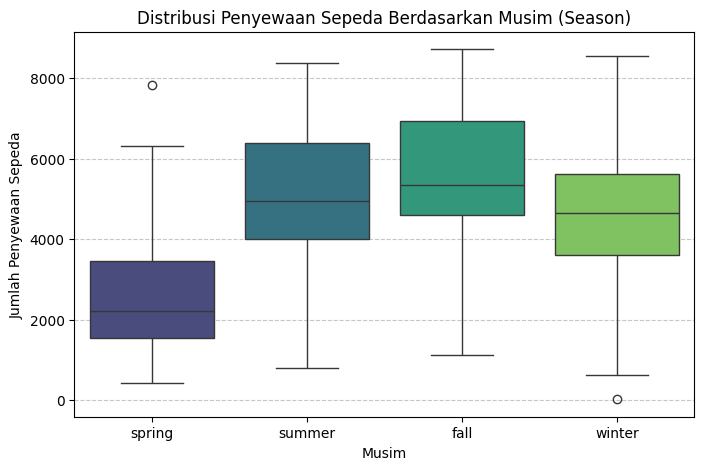

<ipython-input-30-bb0e054e1e9d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


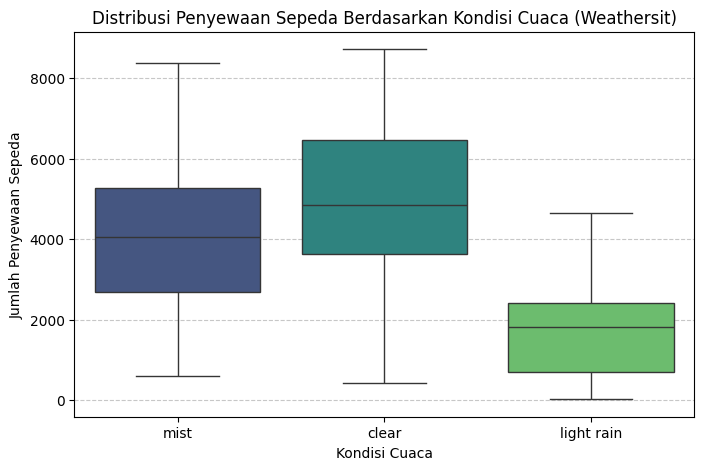

In [30]:
# Visualisasi distribusi penyewaan berdasarkan musim
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='season',
    y='cnt',
    data=day_df,
    palette='viridis'
)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim (Season)")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualisasi distribusi penyewaan berdasarkan kondisi cuaca
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='weathersit',
    y='cnt',
    data=day_df,
    palette='viridis'
)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca (Weathersit)")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. Pengaruh Musim terhadap Jumlah Penyewaan Sepeda:
Musim Summer dan Fall menunjukkan jumlah penyewaan sepeda yang paling tinggi. Hal ini mungkin karena cuaca yang nyaman dan lebih banyak orang yang beraktivitas di luar ruangan pada musim-musim tersebut.
Musim Winter memiliki jumlah penyewaan yang relatif rendah. Ini dapat disebabkan oleh cuaca yang dingin dan kurang mendukung untuk bersepeda.
Musim Spring juga memiliki penyewaan yang lebih rendah dibandingkan Summer dan Fall, mungkin karena cuaca yang masih berfluktuasi.
2. Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda:
Pada kondisi cuaca cerah, jumlah penyewaan sepeda cenderung lebih tinggi, menunjukkan bahwa cuaca yang baik mendorong lebih banyak orang untuk bersepeda.
Ketika cuaca mendung, jumlah penyewaan sedikit menurun, tetapi tidak terlalu signifikan.
Pada kondisi hujan ringan, jumlah penyewaan sepeda menurun tajam, menunjukkan bahwa cuaca buruk menjadi faktor penghalang utama bagi pengguna.

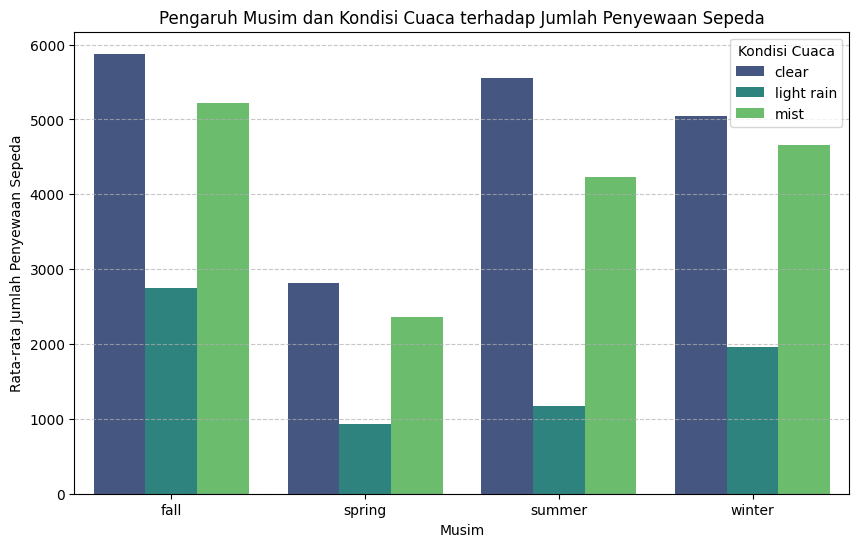

In [31]:
grouped_data = day_df.groupby(['season', 'weathersit'])['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='season',
    y='cnt',
    hue='weathersit',
    data=grouped_data,
    palette='viridis'
)
plt.title('Pengaruh Musim dan Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.legend(title='Kondisi Cuaca')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. Musim dengan Penyewaan Tertinggi adalah Musim Summer, memiliki jumlah penyewaan sepeda tertinggi, terutama pada kondisi cuaca cerah. Ini menunjukkan bahwa cuaca yang hangat dan cerah cenderung meningkatkan minat orang orang untuk menyewa sepeda.

2. Pengaruh Cuaca terhadap Penyewaan pada semua musim, kondisi cuaca cerah menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan dengan cuaca mendung atau hujan ringan.
Hujan ringan memiliki dampak negatif signifikan terhadap jumlah penyewaan sepeda, terlihat dari rendahnya angka penyewaan pada semua musim saat hujan ringan terjadi.

3. Musim dengan Penyewaan Terenda adalah pada Musim Spring, memiliki jumlah penyewaan terendah, terutama saat kondisi cuaca hujan ringan. Hal ini mungkin karena suhu yang masih relatif dingin atau cuaca yang belum stabil di awal tahun.

Secara keseluruhan, faktor cuaca dan musim memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Strategi bisnis dapat mempertimbangkan promosi khusus pada musim dingin dan hari-hari dengan cuaca mendung untuk mendorong penyewaan

### Pertanyaan 2: Bagaimana tren penyewaan berdasarkan hari kerja dan hari libur?

<ipython-input-32-5b22d3b28c89>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'jumlah penyewaan sepeda')

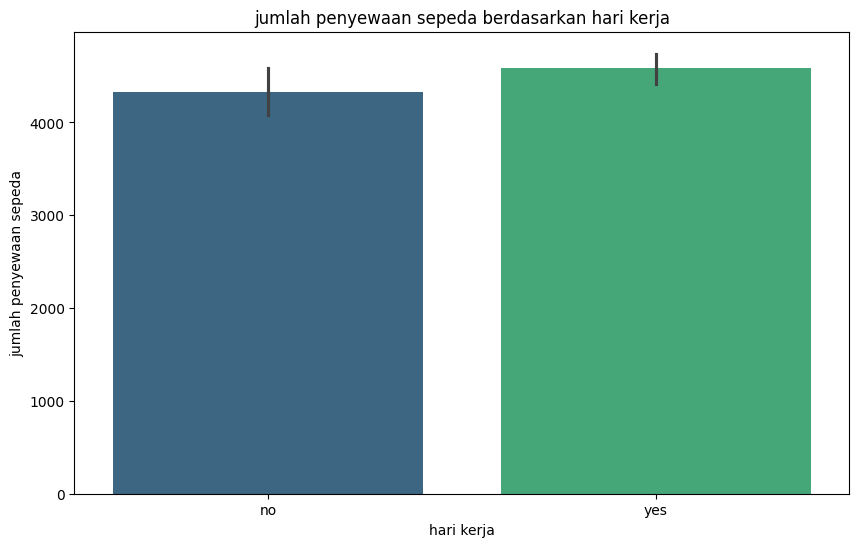

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='workingday',
    y='cnt',
    data=day_df,
    palette='viridis'
)
plt.title('jumlah penyewaan sepeda berdasarkan hari kerja')
plt.xlabel('hari kerja')
plt.ylabel('jumlah penyewaan sepeda')

Berdasarkan visualisasi di atas, terlihat bahwa jumlah penyewaan sepeda pada hari kerja sedikit lebih tinggi dibandingkan hari libur. Hal ini menunjukkan bahwa sepeda lebih sering digunakan untuk keperluan aktivitas harian, seperti pergi bekerja atau beraktivitas rutin pada hari kerja. Sementara itu, pada hari libur, meskipun jumlah penyewaan masih cukup signifikan, penggunaannya cenderung lebih rendah.

### Pertanyaan 3: Kapan jam-jam sibuk penyewaan sepeda dalam sehari?

Grouping berdasarkan jam sibuk penyewaan sepeda:
   waktu      cnt
3   Sore  1101169
2  Siang  1005711
1   Pagi   629742
0  Malam   556057


<ipython-input-33-0105535fac7d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


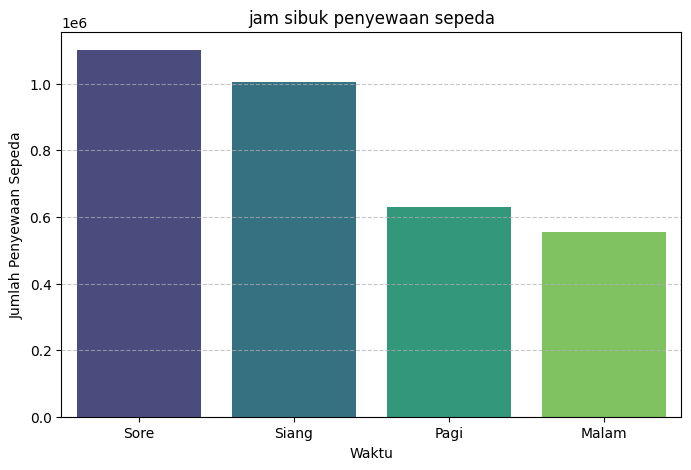

In [33]:
def categorize_time(hour):
    if 6 <= hour <= 9:
        return 'Pagi'
    elif 10 <= hour <= 15:
        return 'Siang'
    elif 16 <= hour <= 19:
        return 'Sore'
    else:
        return 'Malam'

hour_df['waktu'] = hour_df['hr'].apply(categorize_time)

jam_sibuk = hour_df.groupby('waktu')['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False)

print("Grouping berdasarkan jam sibuk penyewaan sepeda:")
print(jam_sibuk)

plt.figure(figsize=(8, 5))
sns.barplot(
    x='waktu',
    y='cnt',
    data=jam_sibuk,
    palette='viridis'
)
plt.title("jam sibuk penyewaan sepeda")
plt.xlabel("Waktu")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.grid(axis='y', linestyle='--', alpha=0.7)


dari hasil visualisasi tersebut, waktu puncak penyewaan sepeda berada pada sore dan siang hari, cenderung berbeda dengan pagi dan malam yang lebih sedikit peminjamnya

### Pertanyaan 4: Apakah ada perbedaan pola penyewaan antara pengguna biasa dan pengguna terdaftar?

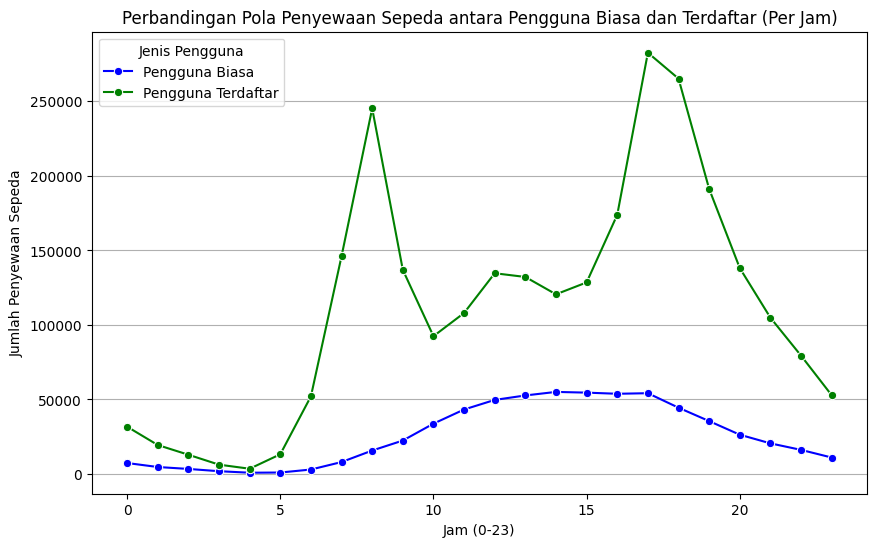

In [34]:
pengguna_group = hour_df.groupby('hr').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

# Visualisasi Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='hr',
    y='casual',
    data=pengguna_group,
    marker='o',
    label='Pengguna Biasa',
    color='blue'
)
sns.lineplot(
    x='hr',
    y='registered',
    data=pengguna_group,
    marker='o',
    label='Pengguna Terdaftar',
    color='green'
)
plt.title("Perbandingan Pola Penyewaan Sepeda antara Pengguna Biasa dan Terdaftar (Per Jam)")
plt.xlabel("Jam (0-23)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.legend(title="Jenis Pengguna")
plt.grid(axis='y')
plt.show()


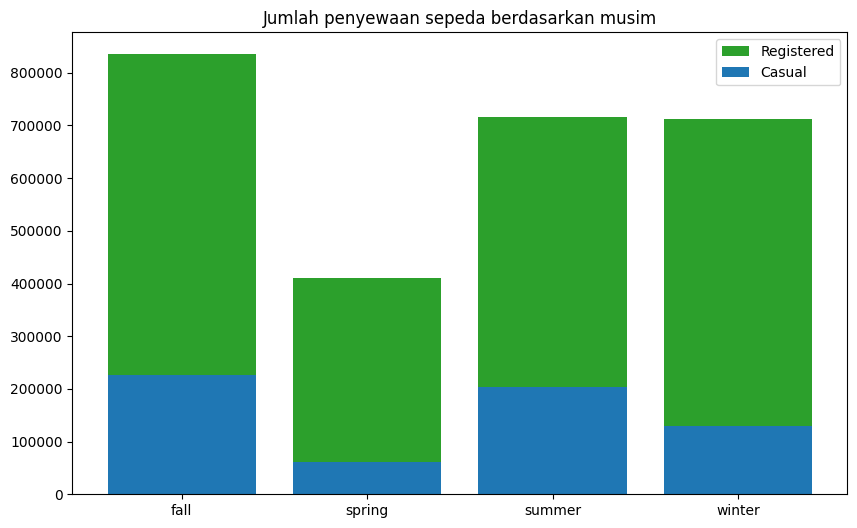

In [35]:
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:green'
)
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:blue'
)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

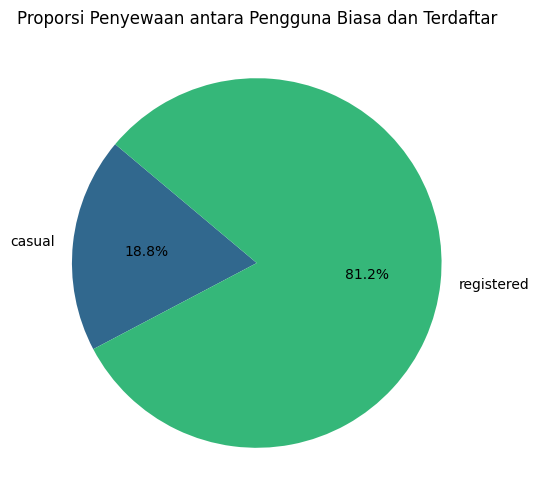

In [36]:
pengguna_group = hour_df.agg({'casual': 'sum', 'registered': 'sum'}).reset_index()
pengguna_group.columns = ['Jenis Pengguna', 'Jumlah Penyewaan']

# Visualisasi Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(
    pengguna_group['Jumlah Penyewaan'],
    labels=pengguna_group['Jenis Pengguna'],
    autopct='%1.1f%%',
    colors=sns.color_palette('viridis', 2),
    startangle=140
)
plt.title("Proporsi Penyewaan antara Pengguna Biasa dan Terdaftar")
plt.show()


Berdasarkan hasil visualisasi yang diberikan, berikut adalah kesimpulan terkait perbedaan pola penyewaan antara pengguna biasa (casual) dan pengguna terdaftar (registered):

Perbedaan Pola Harian:
Pengguna terdaftar menunjukkan pola penyewaan yang sangat fluktuatif sepanjang hari dengan puncak penyewaan yang jelas pada jam sibuk sore (sekitar jam 17-18). Hal ini kemungkinan besar karena pengguna terdaftar memanfaatkan sepeda sebagai sarana transportasi rutin seperti pergi dan pulang kerja.
Sebaliknya, pengguna biasa menunjukkan pola yang relatif stabil dan cenderung rendah sepanjang hari tanpa puncak signifikan. Ini menunjukkan bahwa pengguna biasa mungkin memanfaatkan sepeda untuk rekreasi atau kebutuhan yang tidak rutin.

Perbedaan Jumlah Penyewaan secara Keseluruhan:
Pengguna terdaftar mendominasi jumlah penyewaan sepeda dengan persentase sekitar 81,2% dari total penyewaan, sedangkan pengguna biasa hanya menyumbang sekitar 18,8%. Hal ini mengindikasikan bahwa layanan penyewaan sepeda lebih banyak digunakan oleh pelanggan setia atau pengguna terdaftar yang mungkin sudah memahami manfaat langganan.

## Analisis Lanjutan (Opsional)

RFM Analysis Berdasarkan Kondisi Cuaca (Weathersit):
    weathersit  Recency  Frequency  Monetary
365      clear      365        463   2257952
366      clear      364        463   2257952
729      clear        1        463   2257952
364      clear      366        463   2257952
363      clear      367        463   2257952
..         ...      ...        ...       ...
348       mist      382        247    996858
347       mist      383        247    996858
338       mist      392        247    996858
326       mist      404        247    996858
730       mist        0        247    996858

[731 rows x 4 columns]


<ipython-input-37-fd8d58599336>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='Recency', data=rfm_weather, ci=None, palette='viridis')
<ipython-input-37-fd8d58599336>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='Recency', data=rfm_weather, ci=None, palette='viridis')
<ipython-input-37-fd8d58599336>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='Frequency', data=rfm_weather, ci=None, palette='viridis')
<ipython-input-37-fd8d58599336>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='Fr

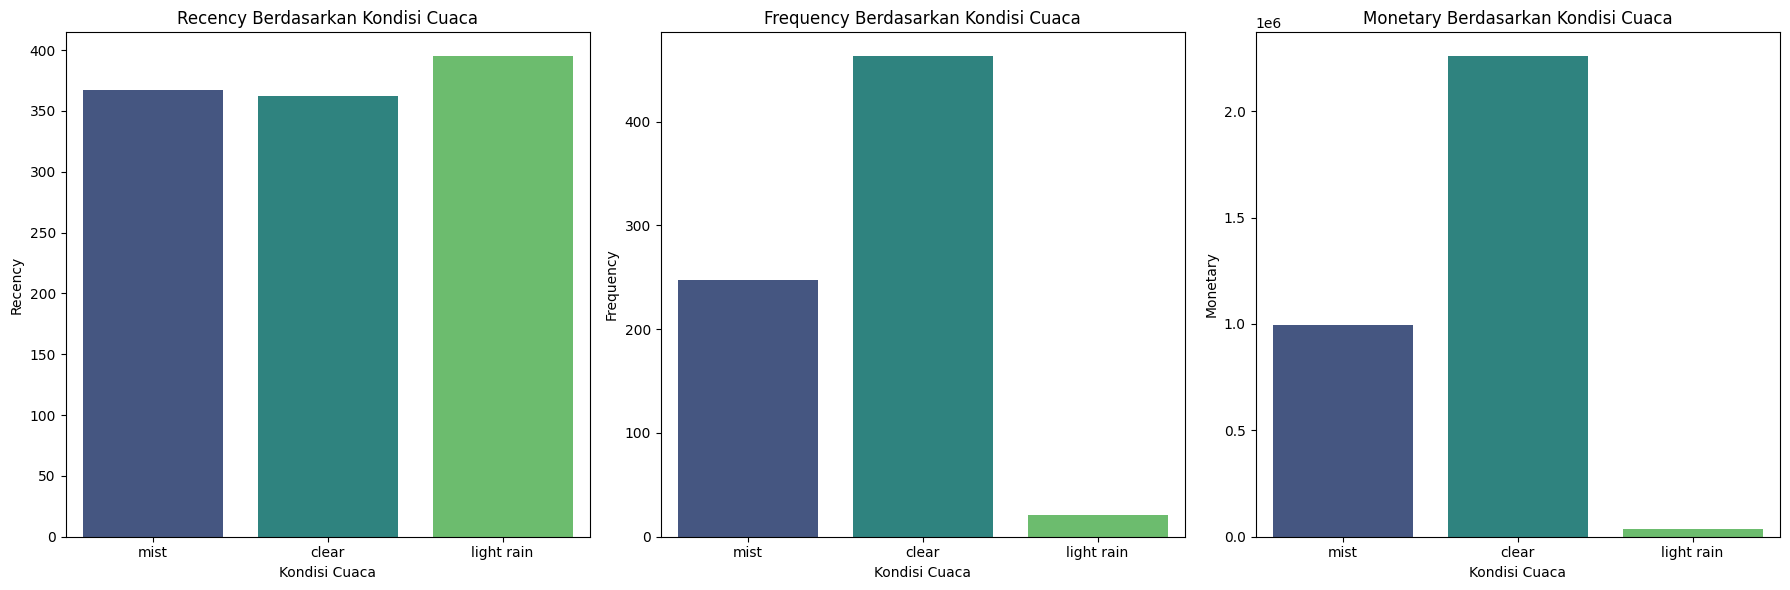

In [37]:
rfm_weather = day_df.copy()
rfm_weather['Recency'] = (rfm_weather['dteday'].max() - rfm_weather['dteday']).dt.days
rfm_weather['Frequency'] = rfm_weather.groupby('weathersit')['cnt'].transform('count')
rfm_weather['Monetary'] = rfm_weather.groupby('weathersit')['cnt'].transform('sum')

print("RFM Analysis Berdasarkan Kondisi Cuaca (Weathersit):")
print(rfm_weather[['weathersit', 'Recency', 'Frequency', 'Monetary']].drop_duplicates().sort_values(by='weathersit'))

# Visualisasi RFM Berdasarkan Kondisi Cuaca
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='weathersit', y='Recency', data=rfm_weather, ci=None, palette='viridis')
plt.title("Recency Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Recency")

plt.subplot(1, 3, 2)
sns.barplot(x='weathersit', y='Frequency', data=rfm_weather, ci=None, palette='viridis')
plt.title("Frequency Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
sns.barplot(x='weathersit', y='Monetary', data=rfm_weather, ci=None, palette='viridis')
plt.title("Monetary Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Monetary")
plt.tight_layout()
plt.show()
rfm_weather = day_df.copy()
rfm_weather['Recency'] = (rfm_weather['dteday'].max() - rfm_weather['dteday']).dt.days
rfm_weather['Frequency'] = rfm_weather.groupby('weathersit')['cnt'].transform('count')
rfm_weather['Monetary'] = rfm_weather.groupby('weathersit')['cnt'].transform('sum')

## Conclusion

**- Conclution pertanyaan 1**

Musim dengan Penyewaan Tertinggi adalah Musim Summer, memiliki jumlah penyewaan sepeda tertinggi, terutama pada kondisi cuaca cerah. Hujan ringan memiliki dampak negatif signifikan terhadap jumlah penyewaan sepeda, terlihat dari rendahnya angka penyewaan pada semua musim saat hujan ringan terjadi.
Musim dengan Penyewaan Terenda adalah pada Musim Spring, memiliki jumlah penyewaan terendah, terutama saat kondisi cuaca hujan ringan.

* Musim berpengaruh terhadap jumlah penyewaan sepeda, pada Musim Summer dan Fall menunjukkan jumlah penyewaan sepeda yang paling tinggi. Musim Winter memiliki jumlah penyewaan yang relatif rendah. Musim Spring juga memiliki penyewaan yang lebih rendah dibandingkan Summer dan Fall
* Kondisi cuaca pun berpangaruh terhadap jumlah penyewaan sepeda, pada kondisi cuaca cerah, jumlah penyewaan sepeda cenderung lebih tinggi, Ketika cuaca mendung, jumlah penyewaan sedikit menurun, tetapi tidak terlalu signifikan. Pada kondisi hujan ringan, jumlah penyewaan sepeda menurun tajam

Secara keseluruhan, faktor cuaca dan musim memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Strategi bisnis dapat mempertimbangkan promosi khusus pada musim dingin dan hari-hari dengan cuaca mendung untuk mendorong penyewaan


**- Conclution pertanyaan 2**

Tren penyewaan sepeda pada hari kerja dan hari libur berdasarkan visualisasi, terlihat bahwa jumlah penyewaan sepeda pada hari kerja sedikit lebih tinggi dibandingkan hari libur. Hal ini menunjukkan bahwa sepeda lebih sering digunakan untuk keperluan aktivitas harian, seperti pergi bekerja atau beraktivitas rutin pada hari kerja. Sementara itu, pada hari libur, meskipun jumlah penyewaan masih cukup signifikan, penggunaannya cenderung lebih rendah


**- Conclution pertanyaan 3**
Sore hari tercatat sebagai waktu dengan jumlah penyewaan sepeda tertinggi, diikuti oleh siang hari, Pagi hari memiliki jumlah penyewaan yang lebih rendah dibandingkan sore dan siang, Malam hari menunjukkan jumlah penyewaan sepeda terendah.
Secara keseluruhan, tren menunjukkan bahwa sebagian besar penyewaan sepeda terjadi pada sore dan siang hari, sementara pagi dan malam memiliki aktivitas yang lebih rendah


**- Conclution pertanyaan 4**
Pengguna terdaftar menunjukkan pola penyewaan yang cukup fluktuatif sepanjang hari dengan puncak penyewaan yang jelas pada jam sibuk sore. Hal ini kemungkinan besar karena pengguna terdaftar memanfaatkan sepeda sebagai sarana transportasi rutin seperti pergi dan pulang kerja.
Sebaliknya, pengguna biasa menunjukkan pola yang relatif stabil dan cenderung rendah sepanjang hari tanpa puncak signifikan. Ini menunjukkan bahwa pengguna biasa mungkin memanfaatkan sepeda untuk rekreasi atau kebutuhan yang tidak rutin

In [38]:
hour_df.to_csv('main_data.csv', index=False)